# Cohomology

The BATS interface for cohomology is currently under development.

Let's look at the cohomology algorithm applied to a Vietoris-Rips filtration

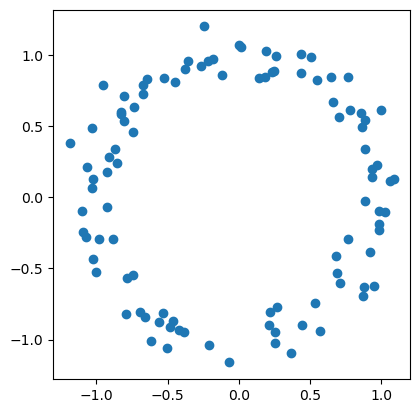

In [2]:
import bats
import numpy as np
import matplotlib.pyplot as plt
import time

n = 100
np.random.seed(0)
X = np.random.normal(size=(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,2), scale = 0.1 )
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')
plt.show(fig)

The standard interface for computing persistent homology is through `bats.reduce`

In [3]:
R = bats.RipsFiltration(bats.DataSet(bats.Matrix(X)), bats.Euclidean(), np.inf, 2)
t0 = time.monotonic()
RR = bats.reduce(R, bats.F2(), bats.standard_reduction_flag(), bats.clearing_flag())
t1 = time.monotonic()
print("{} sec. elapsed".format(t1 - t0))

0.2538292409999485 sec. elapsed


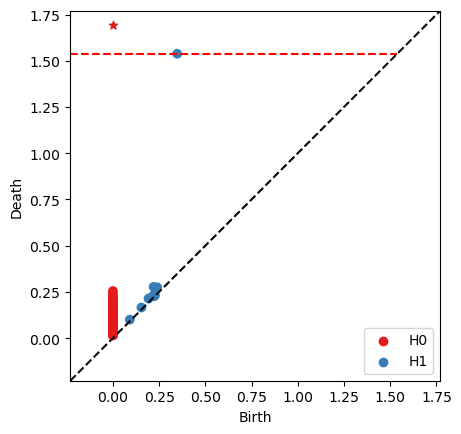

In [4]:
ps = RR.persistence_pairs(0) + RR.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

In [5]:
for p in ps:
    if p.length() > 0.5:
        print(p)

0 : (0,inf) <0,-1>
1 : (0.347661,1.53775) <477,36355>


Currently, to compute cohomology, we create a `FilteredDGVectorSpace` (Filtered differential graded vector space) of degree +1.

In [6]:
t0 = time.monotonic()
RC = bats.FilteredF2DGVectorSpace(R, +1)
t1 = time.monotonic()
print("{} sec. elapsed".format(t1 - t0))

0.055660856000031345 sec. elapsed


We can then obtain a reduced DGVS

In [7]:
t0 = time.monotonic()
RRC = bats.ReducedFilteredF2DGVectorSpace(RC, bats.standard_reduction_flag(), bats.clearing_flag())
t1 = time.monotonic()
print("{} sec. elapsed".format(t1 - t0))

0.016731122999772197 sec. elapsed


We see here that we obtain the same persistence barcode

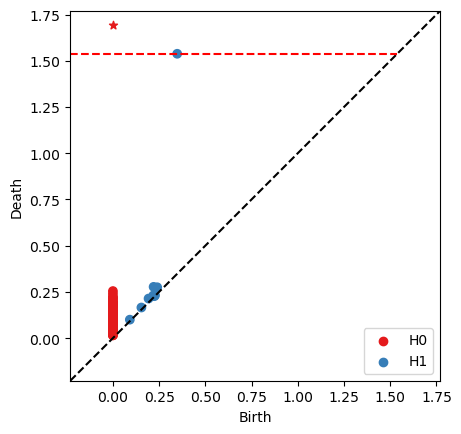

In [8]:
ps = RRC.persistence_pairs(0) + RRC.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

In [9]:
for p in ps:
    if p.length() > 0.5:
        print(p)

0 : (0,inf) <0,-1>
1 : (0.347661,1.53775) <477,36355>


You can use the same optimzation flags as you can with `ChainComplexes`.  For Vietoris-Rips filtrations, standard reduction with the clearing optimization tends to perform best.

In [12]:
flags = [
    (bats.standard_reduction_flag(),),
    (bats.standard_reduction_flag(), bats.clearing_flag()),
    (bats.extra_reduction_flag(),),
    (bats.extra_reduction_flag(), bats.clearing_flag()),
    
]

for fs in flags:
    print("\n")
    print(*fs)
    t0 = time.monotonic()
    RC = bats.FilteredF2DGVectorSpace(R, +1)
    RRC = bats.ReducedFilteredF2DGVectorSpace(RC, *fs)
    t1 = time.monotonic()
    print("Cohomology: {} sec. elapsed".format(t1 - t0))
    tco = t1 - t0

    t0 = time.monotonic()
    RR = bats.reduce(R, bats.F2(), *fs)
    t1 = time.monotonic()
    print("Homology:   {} sec. elapsed".format(t1 - t0))
    tho = t1 - t0

    print("{} ratio".format(tco/tho))



Cohomology: 8.13500317099988 sec. elapsed
Homology:   0.268798267999955 sec. elapsed
30.264343708499055 ratio


<bats.linalg.standard_reduction_flag object at 0x7ff273b80a70> <bats.linalg.clearing_flag object at 0x7ff273b80ab0>
Cohomology: 0.06653535200030092 sec. elapsed
Homology:   0.2708823439998014 sec. elapsed
0.24562454317934324 ratio


Cohomology: 0.19791504100021484 sec. elapsed
Homology:   0.2574274709995734 sec. elapsed
0.7688186510620804 ratio


<bats.linalg.extra_reduction_flag object at 0x7ff273b80b30> <bats.linalg.clearing_flag object at 0x7ff273b80b70>
Cohomology: 0.19697300699999687 sec. elapsed
Homology:   0.18752039200035142 sec. elapsed
1.0504084643745184 ratio


## Levelset Example

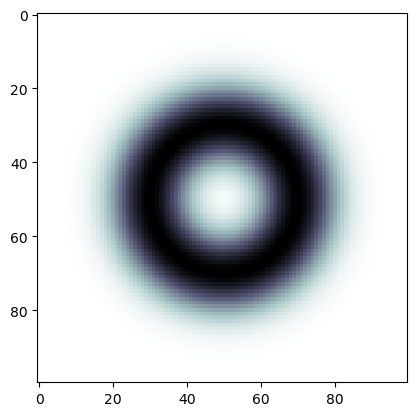

In [13]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
img = np.empty((n,n))

def rad(i,j, n):
    return np.sqrt((i - n/2)**2 + (j - n/2)**2)

for i in range(n):
    for j in range(n):
#         print(i,j, rad(i,j,n))
        img[i,j] = 1-np.exp(-(rad(i,j,n) - 20)**2/100)

plt.imshow(img, cmap='bone')
plt.show()

Standard reduction:

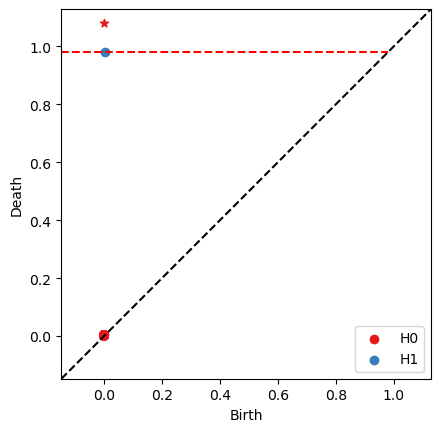

In [14]:
X = bats.Freudenthal(n, n)
vals, imax = bats.lower_star_filtration(X, img.flatten()) # computes filtration parameter to
F = bats.Filtration(X, vals)

RF = bats.reduce(F, bats.F2())
ps = RF.persistence_pairs(0) + RF.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

cohomology:

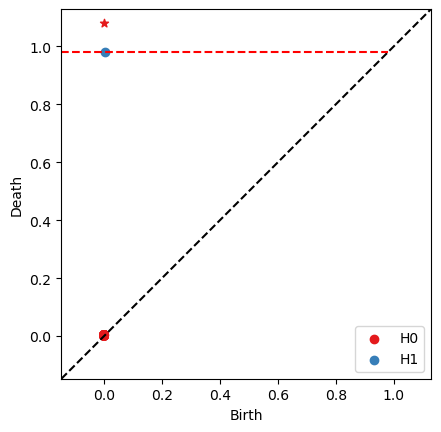

In [15]:
FC = bats.FilteredF2DGVectorSpace(F, +1)
RF = bats.ReducedFilteredF2DGVectorSpace(FC, *fs)
ps = RF.persistence_pairs(0) + RF.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

For levelset filtrations, cohomology may not perform better than homology:

In [18]:
flags = [
    (bats.standard_reduction_flag(),),
    (bats.standard_reduction_flag(), bats.clearing_flag()),
    (bats.extra_reduction_flag(),),
    (bats.extra_reduction_flag(), bats.clearing_flag()),
    
]

for fs in flags:
    print("\n")
    print(*fs)
    t0 = time.monotonic()
    RC = bats.FilteredF2DGVectorSpace(F, +1)
    RRC = bats.ReducedFilteredF2DGVectorSpace(RC, *fs)
    t1 = time.monotonic()
    print("Cohomology: {} sec. elapsed".format(t1 - t0))
    tco = t1 - t0

    t0 = time.monotonic()
    RR = bats.reduce(F, bats.F2(), *fs)
    t1 = time.monotonic()
    print("Homology:   {} sec. elapsed".format(t1 - t0))
    tho = t1 - t0

    print("{} ratio".format(tco/tho))



Cohomology: 0.08201590099997702 sec. elapsed
Homology:   0.043171452000024146 sec. elapsed
1.8997716592884377 ratio


<bats.linalg.standard_reduction_flag object at 0x7ff272b99230> <bats.linalg.clearing_flag object at 0x7ff272b99630>
Cohomology: 0.04401853199942707 sec. elapsed
Homology:   0.01971157000025414 sec. elapsed
2.2331317088826275 ratio


Cohomology: 0.0660951700001533 sec. elapsed
Homology:   0.04059228999994957 sec. elapsed
1.6282690629239054 ratio


<bats.linalg.extra_reduction_flag object at 0x7ff272b99070> <bats.linalg.clearing_flag object at 0x7ff272b990f0>
Cohomology: 0.04255063600066933 sec. elapsed
Homology:   0.022272994000559265 sec. elapsed
1.9104138401689912 ratio
